# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [187]:
import pandas as pd
pd.options.plotting.backend = "plotly"
pd.set_option('display.max_columns', None)  
import warnings
warnings.filterwarnings('ignore')

# para pintar

import plotly.express as px
import seaborn as sns
import pylab as plt

# importamos modelos

from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import LogisticRegression as LogR

# importamos métricas

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.metrics import precision_score as prec
from sklearn.metrics import recall_score as rec
from sklearn.metrics import balanced_accuracy_score as bacc
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix as cm


## Regression Model Evaluation

In [139]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing() 

X = pd.DataFrame(housing["data"], columns=housing["feature_names"])
y = pd.DataFrame(housing["target"], columns=['MedHouseVal'])

data = pd.concat([X, y], axis=1)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [140]:
print(X.shape)
X.head()

(20640, 8)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [141]:
print(y.shape)
y.head()

(20640, 1)


,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [142]:
# Los valores no siguen una distribución normal. Demasiados ouliers???
y.hist(nbins=500)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [143]:
X_train, X_test, y_train, y_test = tts(X,
                                       y,
                                       test_size=0.2,
#                                       stratify=y,      # Revisar porque me da error al aplicar stratify
                                       random_state=42
                                      )

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [144]:
linreg = LR()
linreg.fit(X_train,y_train)
y_hat_train = linreg.predict(X_train)
y_hat = linreg.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [145]:
linreg.score(X_train,y_train)

0.6125511913966952

In [146]:
r2(y_train,y_hat_train)

0.6125511913966952

In [147]:
linreg.score(X_test,y_test)

0.5757877060324511

In [148]:
r2(y_test,y_hat)

0.5757877060324511

## 4. Calculate and print mean squared error for both the training and the testing set.

In [149]:
mse(y_train,y_hat_train,squared=False)

0.7196757085831575

In [150]:
mse(y_test,y_hat,squared=False)

0.7455813830127761

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [151]:
mae(y_train,y_hat_train)

0.5286283596581928

In [152]:
mae(y_test,y_hat)

0.5332001304956558


<span style="color: green;">
    El resultado obtenido es lógico con lo que hemos observado previamente: <br>
    1- En el histograma anterior veíamos una gran presencia de outliers para valores cercanos a 5 <br>
    2- Esto se confirma con los valores de MAE y MSE, el MAE es menor en un 25% al MSE
    

</span>

## Classification Model Evaluation

In [153]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [154]:
print(X.shape)
X.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [155]:
print(y.shape)
y.head()

(150, 1)


,class
0,0
1,0
2,0
3,0
4,0


In [156]:
px.bar(y=y.value_counts().values,color=['r','g','b'])

In [157]:
X_train, X_test, y_train, y_test = tts(X,
                                       y,
                                       test_size=0.2,
                                       stratify=y,
                                       random_state=42
                                      )

In [158]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

In [159]:
px.bar(y = y_test.value_counts().values,color=['r','g','b'])

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [160]:
logreg = LogR()
logreg.fit(X_train,y_train)
y_hat_train = logreg.predict(X_train)
y_hat = logreg.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [161]:
logreg.score(X_train,y_train)

0.975

In [169]:
logreg.score(X_test,y_test)

0.9666666666666667

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [170]:
bacc(y_train,y_hat_train)

0.975

In [171]:
bacc(y_test,y_hat)

0.9666666666666667

## 10. Calculate and print the precision score for both the training and the testing set.

In [172]:
prec(y_train,y_hat_train,average='macro')

0.9751928288513655

In [173]:
prec(y_test,y_hat,average='macro')

0.9696969696969697

## 11. Calculate and print the recall score for both the training and the testing set.

In [175]:
rec(y_train,y_hat_train,average='macro')

0.975

In [176]:
rec(y_test,y_hat,average='macro')

0.9666666666666667

## 12. Calculate and print the F1 score for both the training and the testing set.

In [178]:
f1(y_train,y_hat_train,average='macro')

0.974996093139553

In [179]:
f1(y_test,y_hat,average='macro')

0.9665831244778613

## 13. Generate confusion matrices for both the training and the testing set.

In [190]:
cm_train = cm(y_train,y_hat_train) 
cm_test = cm(y_test,y_hat) 

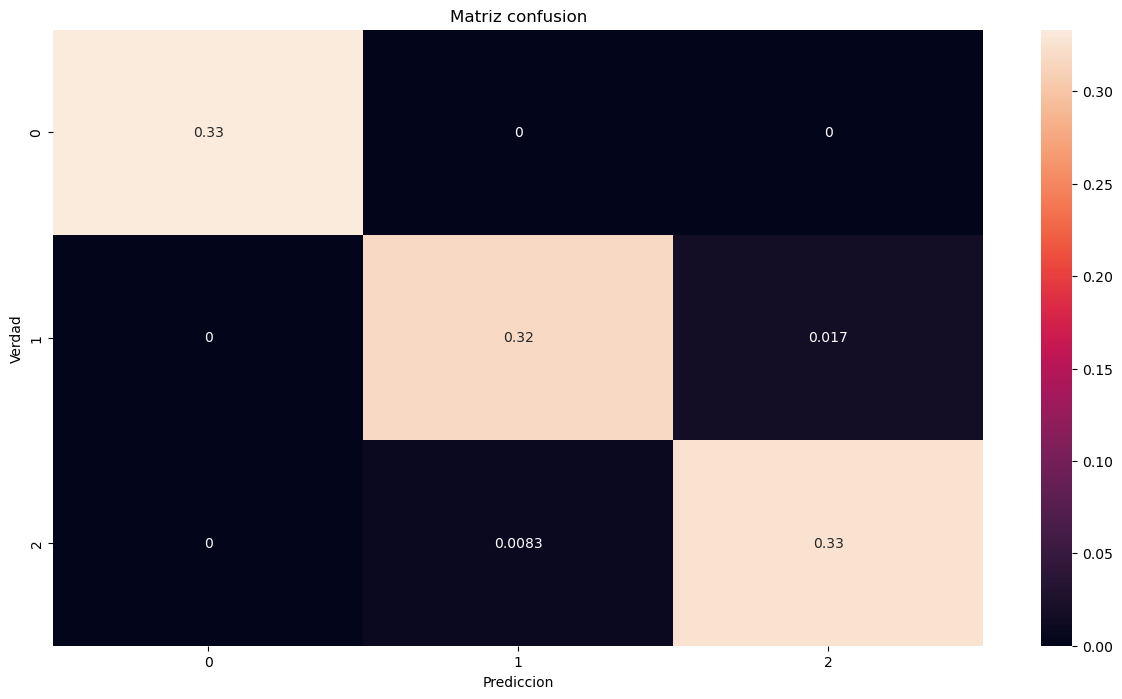

In [188]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm_train/cm_train.sum(), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

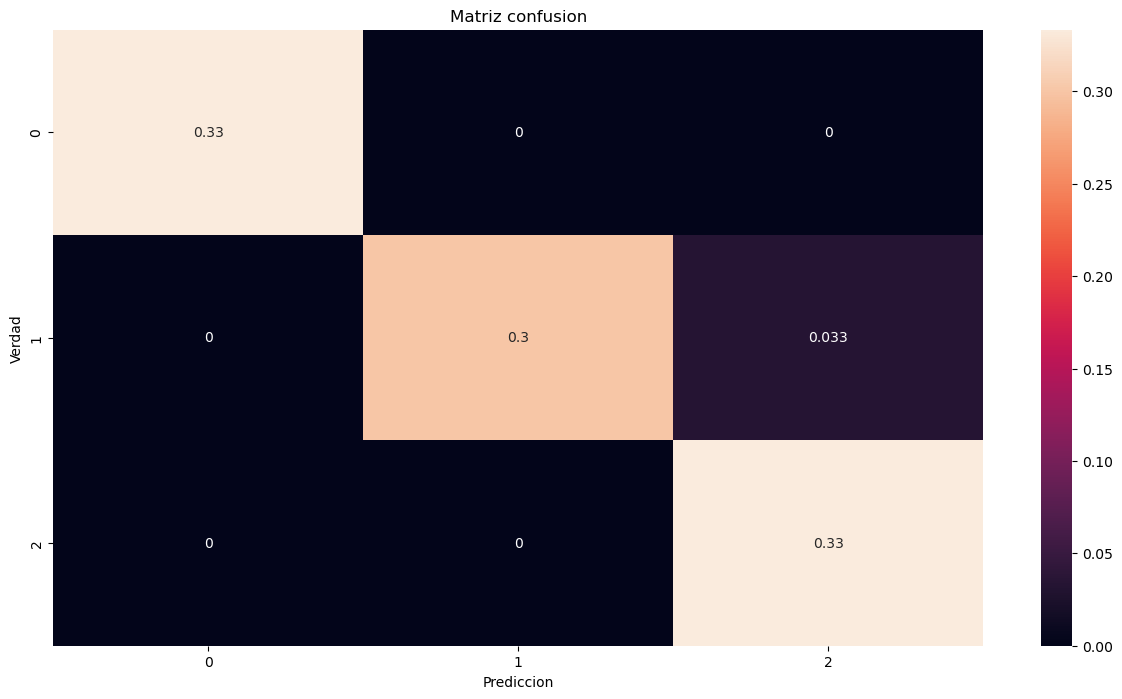

In [191]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm_test/cm_test.sum(), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

<span style="color: green;">
Vemos que el modelo tiene un sesgo con los datos de entrenamiento. Vemos que tiende a predecir 1 cuando es 2, en un ratio 8 veces superior a predecir 2 cuando realmente es 1. Es decir tiende a cometer errores tipo II<br>Pero vemos que en el de test, está mas compensado y únicamente tiene una tasa de error tipo 1 de un 0.03 para los grupos 1 y 2
    

</span>

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.